In [1]:
import numpy as np
import pandas

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)
X, y = np.array(mnist["data"]), np.array(mnist["target"]).astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [3]:
pandas.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Without dimesionality reduction

In [40]:
# Model: RandomForest (very good on mnist, doesn't need scaling)

from sklearn.ensemble import RandomForestClassifier
from time import time

rnd = RandomForestClassifier(min_impurity_decrease = 0.000005, random_state = 42) 
# let's not worry too much about the best hyperparameters; the min_imp_dec is there avoid overfitting

beg = time()
rnd.fit(X_train, y_train)
end = time()

elapsed_wout_red = end - beg

In [41]:
print("Accuracy:", np.mean(y_test == rnd.predict(X_test)))  # Very good!
print("Time elapsed (full training):", elapsed_wout_red)  # 39 seconds... That's pretty slow

Accuracy: 0.9689
Time elapsed (full training): 39.48738145828247


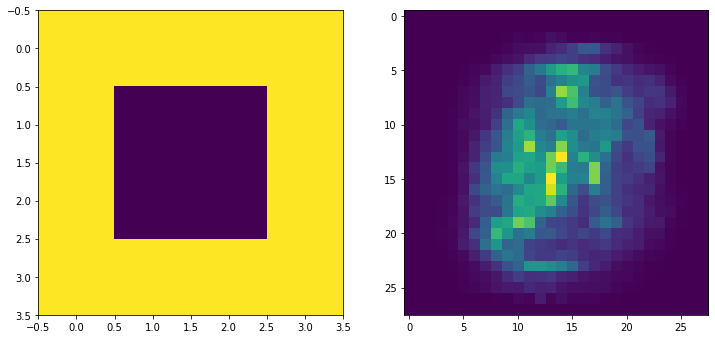

In [95]:
import matplotlib.pyplot as plt

r, c = 1, 2

plt.figure(figsize = (12,6))

plt.subplot(r, c, 1)
plt.imshow([[1, 1, 1, 1], [1, 0, 0, 1], [1, 0, 0, 1], [1, 1, 1, 1]])  # the brighter, the higher the value

plt.subplot(r, c, 2)
plt.imshow(rnd.feature_importances_.reshape((28, 28))) 

plt.show()

# We can see that only the center region is important. The border consists of almost useless features. Let's try to remove them.

# With dimensionality reduction

In [42]:
from sklearn.decomposition import PCA  # since we only want to "remove" bad features, PCA is a good option

reductor = PCA(n_components = 0.95)  # reducing dimensionality in order to still mantain 95% of variance

beg = time()
X_train_reduced = reductor.fit_transform(X_train)
end = time()

elapsed_reduction = end - beg

In [49]:
print("Time elapsed (reduction):", elapsed_reduction)  # Pretty fast
print("Remaining components:", reductor.n_components_)  # There were only 154 (out of 784) features left!!

print(X_train.shape, X_train_reduced.shape)

Time elapsed (reduction): 9.202383518218994
Remaining components: 154
(60000, 784) (60000, 154)


In [53]:
rnd_on_red = RandomForestClassifier(min_impurity_decrease = 0.000005, random_state = 42) # make sure it's the same model

beg = time()
rnd_on_red.fit(X_train_reduced, y_train)
end = time()

elapsed_w_reduction = end - beg

In [54]:
print("Time elapsed (training):", elapsed_w_reduction)

Time elapsed (training): 97.15233945846558


In [55]:
X_test_reduced = reductor.transform(X_test)

print("Accuracy:", np.mean(y_test == rnd_on_red.predict(X_test_reduced)))
print("Time elapsed (full training):", elapsed_reduction + elapsed_w_reduction)  # terribly worse

Accuracy: 0.9486
Time elapsed (full training): 106.35472297668457


In [56]:
# This combination is very bad. Probably, the PCA is making the strongly reliable pixels not that reliable.
# Let's try to use another model

# Trying again...

In [58]:
# Model: SGDClassifier (a linear SVM)

from sklearn.linear_model import SGDClassifier

clf1 = SGDClassifier(random_state=42)

beg = time()
clf1.fit(X_train, y_train)
end = time()

el_clf1 = end - beg

In [59]:
clf2 = SGDClassifier(random_state=42)

beg = time()
clf2.fit(X_train_reduced, y_train)
end = time()

el_clf2 = end - beg

In [61]:
print("Acc (1 vs 2):", 
      np.mean(y_test == clf1.predict(X_test)),
      np.mean(y_test == clf2.predict(X_test_reduced)))

print("Time (1 vs 2):", el_clf1, el_clf2)

Acc (1 vs 2): 0.874 0.8959
Time (1 vs 2): 148.54877185821533 25.93163824081421


In [96]:
# WOOOW! It reduced the train time almost 6 times! AND GOT BETTER RESULTS! 
# Probably, reducing the set made it simpler for clf2 to make preditions, increasing its accuracy

# Visualizations - Transforming MNIST into a 2-dimensional dataset

In [86]:
np.random.seed(42)

m = 5000
idx = np.random.permutation(len(X))[:m]

X_vis = X[idx]
y_vis = y[idx]

In [87]:
reducer = PCA(n_components = 0.95)
X_vis_reduced = super_reducer.fit_transform(X_vis)

In [88]:
# Using the t-SNE algorithm, since it makes similar instances stay closer and different instanced far appart from each other.

from sklearn.manifold import TSNE

vis_reductor = TSNE(n_components = 2, n_jobs=-1, random_state=42) # for transforming MNIST into a 2-dimensional set

mnist_reduced_for_vis = vis_reductor.fit_transform(X_vis_reduced)

In [89]:
print(mnist_reduced_for_vis.shape)

(5000, 2)


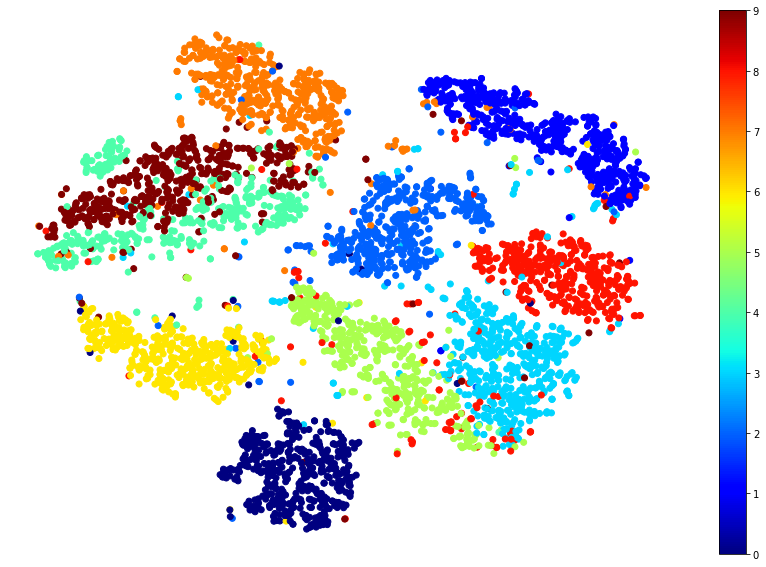

In [90]:
plt.figure(figsize=(15.0, 10.0))
plt.scatter(mnist_reduced_for_vis[:, 0], mnist_reduced_for_vis[:, 1], c=y_vis, cmap='jet', alpha=1)
plt.axis('off')
plt.colorbar()

plt.show()

#### Here, we can see the similarity of the digits based on how clustered they are. Similar digits (such as 9 and 4) are clustered together, while distinct ones (such as 0 and 1) stay far appart from each other.